In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string 
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
from os import path
from PIL import Image

%matplotlib inline

In [2]:
traini  = pd.read_csv('train.csv')
test = pd.read_csv('test_tweets.csv')

In [3]:
from sklearn.utils import resample
train_majority = traini[traini.label==0]
train_minority = traini[traini.label==1]
train_minority_upsampled = resample(train_minority, 
                                 replace=True,    
                                 n_samples=len(train_majority),   
                                 random_state=123)
train = pd.concat([train_minority_upsampled, train_majority])
train['label'].value_counts()
train.shape

(11788, 3)

In [4]:
combi = train.append(test, ignore_index=True, sort=False)
combi.shape

(28985, 3)

In [5]:
combi.tail()
combi.dtypes

id         int64
label    float64
tweet     object
dtype: object

In [6]:
test.tail()

,id,tweet
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."
17196,49159,"my song ""so glad"" free download! #shoegaze ..."


In [7]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

In [8]:
input_txt= 'Hi, This is Akshita!'
pattern='This'
remove_pattern(input_txt, pattern)

'Hi,  is Akshita!'

In [9]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

In [10]:
combi.head(15)

,id,label,tweet,tidy_tweet
0,6017,1.0,Morning 160 mile drive to homestead. Thank god...,Morning 160 mile drive to homestead. Thank god...
1,5454,1.0,"If you don't have an iPhone, you don't have an...","If you don't have an iPhone, you don't have an..."
2,5526,1.0,IT SYNCED! AFTER 24HRS OF TROUBLE-SHOOTING THI...,IT SYNCED! AFTER 24HRS OF TROUBLE-SHOOTING THI...
3,5319,1.0,I how I got the #iphone and I'm not using #twi...,I how I got the #iphone and I'm not using #twi...
4,7863,1.0,U Apple if you haven’t noticed your update suc...,U Apple if you haven’t noticed your update suc...
5,4380,1.0,If your shitty earphones are leaking your shit...,If your shitty earphones are leaking your shit...
6,6896,1.0,Seriously confused as to why anyone would want...,Seriously confused as to why anyone would want...
7,4091,1.0,"“@fukami: Get OSX Mavericks, get your data syn...","“: Get OSX Mavericks, get your data sync via U..."
8,6276,1.0,Why does everything with apple have to be such...,Why does everything with apple have to be such...
9,435,1.0,"Funny thing, why doesn't windows sue Apple for...","Funny thing, why doesn't windows sue Apple for..."


In [11]:
# remove special characters, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [12]:
combi.head(15)

,id,label,tweet,tidy_tweet
0,6017,1.0,Morning 160 mile drive to homestead. Thank god...,Morning mile drive to homestead Thank god...
1,5454,1.0,"If you don't have an iPhone, you don't have an...",If you don t have an iPhone you don t have an...
2,5526,1.0,IT SYNCED! AFTER 24HRS OF TROUBLE-SHOOTING THI...,IT SYNCED AFTER HRS OF TROUBLE SHOOTING THI...
3,5319,1.0,I how I got the #iphone and I'm not using #twi...,I how I got the #iphone and I m not using #twi...
4,7863,1.0,U Apple if you haven’t noticed your update suc...,U Apple if you haven t noticed your update suc...
5,4380,1.0,If your shitty earphones are leaking your shit...,If your shitty earphones are leaking your shit...
6,6896,1.0,Seriously confused as to why anyone would want...,Seriously confused as to why anyone would want...
7,4091,1.0,"“@fukami: Get OSX Mavericks, get your data syn...",Get OSX Mavericks get your data sync via U...
8,6276,1.0,Why does everything with apple have to be such...,Why does everything with apple have to be such...
9,435,1.0,"Funny thing, why doesn't windows sue Apple for...",Funny thing why doesn t windows sue Apple for...


In [13]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [14]:
combi.head()

,id,label,tweet,tidy_tweet
0,6017,1.0,Morning 160 mile drive to homestead. Thank god...,Morning mile drive homestead Thank god only tw...
1,5454,1.0,"If you don't have an iPhone, you don't have an...",you don have iPhone you don have iPhone SHIT #...
2,5526,1.0,IT SYNCED! AFTER 24HRS OF TROUBLE-SHOOTING THI...,SYNCED AFTER HRS TROUBLE SHOOTING THIS IOS UPD...
3,5319,1.0,I how I got the #iphone and I'm not using #twi...,how got the #iphone and not using #twitter Lol...
4,7863,1.0,U Apple if you haven’t noticed your update suc...,Apple you haven noticed your update sucks COCK...


In [15]:
#Tokenization
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [Morning, mile, drive, homestead, Thank, god, ...
1    [you, don, have, iPhone, you, don, have, iPhon...
2    [SYNCED, AFTER, HRS, TROUBLE, SHOOTING, THIS, ...
3    [how, got, the, #iphone, and, not, using, #twi...
4    [Apple, you, haven, noticed, your, update, suc...
Name: tidy_tweet, dtype: object

In [16]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Akshita
[nltk_data]     Jain\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
#Lemmatizing

from nltk.stem.wordnet import *
lemmatizer = nltk.stem.WordNetLemmatizer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x]) # lemmatizing
tokenized_tweet.head()


0    [Morning, mile, drive, homestead, Thank, god, ...
1    [you, don, have, iPhone, you, don, have, iPhon...
2    [SYNCED, AFTER, HRS, TROUBLE, SHOOTING, THIS, ...
3    [how, got, the, #iphone, and, not, using, #twi...
4    [Apple, you, haven, noticed, your, update, suc...
Name: tidy_tweet, dtype: object

In [18]:
#Stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [morn, mile, drive, homestead, thank, god, onl...
1    [you, don, have, iphon, you, don, have, iphon,...
2    [sync, after, hr, troubl, shoot, thi, io, upda...
3    [how, got, the, #iphon, and, not, use, #twitte...
4    [appl, you, haven, notic, your, updat, suck, c...
Name: tidy_tweet, dtype: object

In [19]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet
combi.head(5)

,id,label,tweet,tidy_tweet
0,6017,1.0,Morning 160 mile drive to homestead. Thank god...,morn mile drive homestead thank god onli twice...
1,5454,1.0,"If you don't have an iPhone, you don't have an...",you don have iphon you don have iphon shit #hy...
2,5526,1.0,IT SYNCED! AFTER 24HRS OF TROUBLE-SHOOTING THI...,sync after hr troubl shoot thi io updat final ...
3,5319,1.0,I how I got the #iphone and I'm not using #twi...,how got the #iphon and not use #twitter lol go...
4,7863,1.0,U Apple if you haven’t noticed your update suc...,appl you haven notic your updat suck cock just...


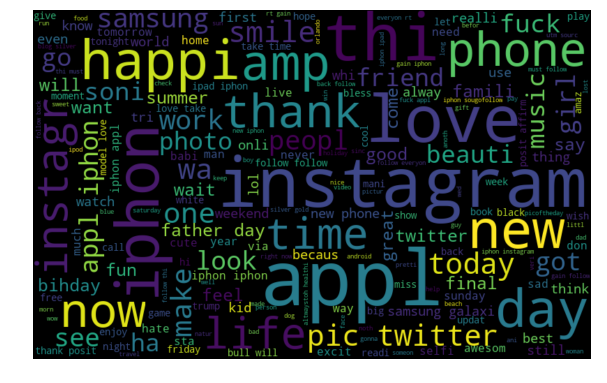

In [20]:
#Wordcloud
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

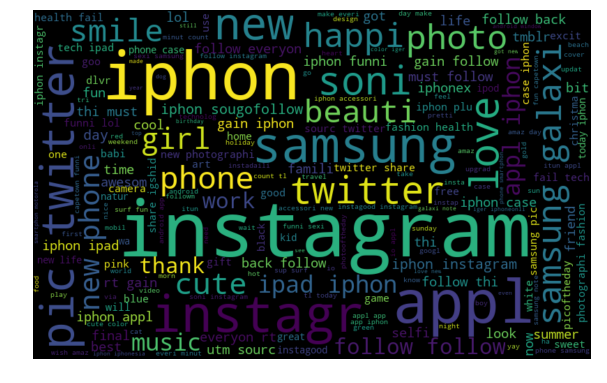

In [21]:
#finding words that will show positivity/negatitivty
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

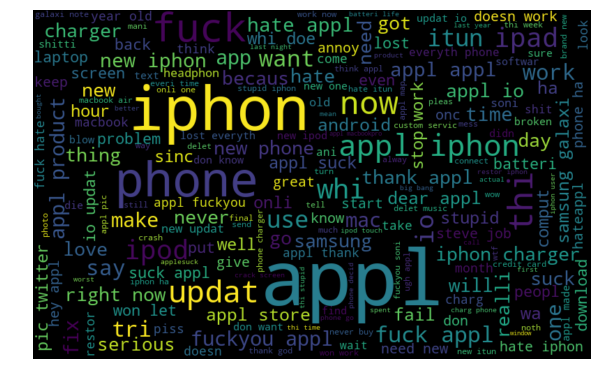

In [22]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [23]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [24]:
# extracting hashtags from normal tweets

HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# extracting hashtags from negative tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

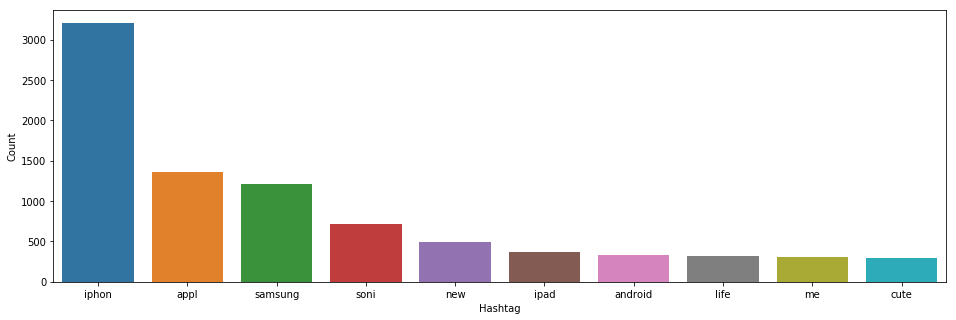

In [25]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

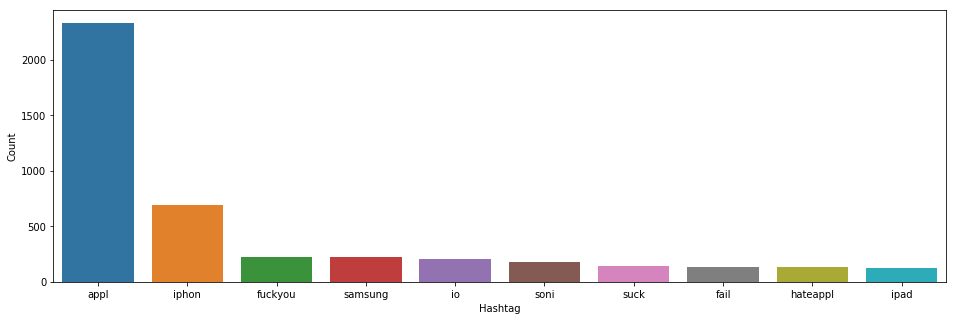

In [26]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:train.shape[0],:]
test_bow = bow[train.shape[0]:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

0.9227568270481146

In [32]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label', 'tweet']]


In [33]:
submission.to_csv('submision1.csv', index=False) # writing data to a CSV file